# Imports

In [1]:
#imports 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron



#print('imports finished')

# Data Input and Preprocessing

In [2]:
#read in data and preprocess it
df = pd.read_csv("Cancer_Data.csv")
df = df.drop('id',axis = 1)

#remove column of NaN that was tacked onto the end for some reason
df=df.dropna(axis=1,how='all')

#encodes data into numerical values
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

#x and y data
y = df['diagnosis']
X = df.drop('diagnosis', axis = 1)

#scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron Model

Create and fit perceptron model

In [3]:
#create the model
per_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
#fit the model
per_model.fit(X_train, y_train)


Perceptron(random_state=42)

make predictions

In [4]:

#make predictions
y_pred_perceptrons = per_model.predict(X_test)

# Sequential Deep Neural Network

Build, train, and compile model

In [5]:
dnn_model = keras.Sequential([
      layers.Dense(96, activation='relu'),

      layers.Dense(96, activation = 'sigmoid'),

      
      
      layers.Dense(96, activation = 'sigmoid'),

      layers.Dense(1, activation = 'sigmoid'),


  ])
dnn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.fit(X_train,y_train, epochs = 100, verbose = 0)


Make predictions

In [6]:
y_pred_dnn = dnn_model.predict(X_test)
y_pred_dnn_binary = []
for i in range(0, len(y_pred_dnn)):
    if y_pred_dnn[i] >= 0.5:
        y_pred_dnn_binary.append(1)
    else:
        y_pred_dnn_binary.append(0)


4/4 [==============================] - 0s 3ms/step


# Evaluate Models 

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def get_scores(y_test,y_pred):
    
    scores = {}
    scores['Accuracy'] = accuracy_score(y_test,y_pred)
    scores['Recall'] = recall_score(y_test,y_pred)
    scores['Precision'] = precision_score(y_test,y_pred)
    scores['F1'] = f1_score(y_test,y_pred)
    

    return scores

def get_confusion(y_test, y_pred):
    confusion_vals = {}

    confusion_mat = confusion_matrix(y_test,y_pred)

    confusion_vals['True Positive'] = confusion_mat[0][0]
    confusion_vals['False Positive'] = confusion_mat[0][1]
    confusion_vals['False Negative'] = confusion_mat[1][0]
    confusion_vals['True Negative'] = confusion_mat[1][1]

    return confusion_vals




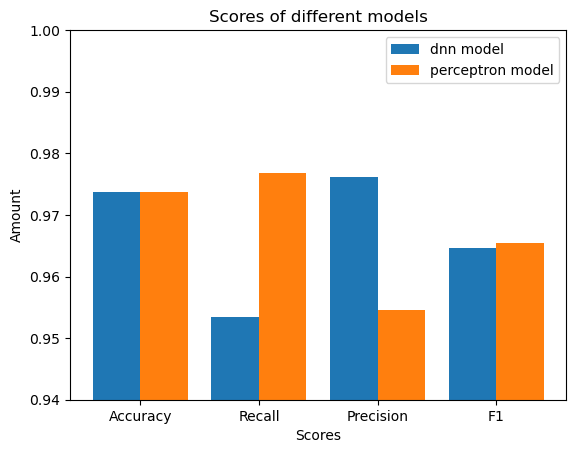

{'True Positive': 70, 'False Positive': 1, 'False Negative': 2, 'True Negative': 41}


In [11]:

X = ['Accuracy', 'Recall', 'Precision', 'F1']
results_dnn = get_scores(y_test,y_pred_dnn_binary)
results_perceptron = get_scores(y_test,y_pred_perceptrons)
Ydnn = results_dnn.values()
Zperceptron = results_perceptron.values()
X_axis = np.arange(len(X))
plt.ylim(0.94,1.0)
plt.bar(X_axis - 0.2, Ydnn, 0.4, label = 'dnn model')
plt.bar(X_axis + 0.2, Zperceptron, 0.4, label = 'perceptron model')
plt.xticks(X_axis, X)
plt.xlabel('Scores')
plt.ylabel('Amount')
plt.title('Scores of different models')
plt.legend()
plt.show()

